<a href="https://colab.research.google.com/github/GuiRibCarra/RN-Simpsons/blob/main/Rede_Neural_Simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rede Neural para deteção do personagem Bart diferenciando com o Homer

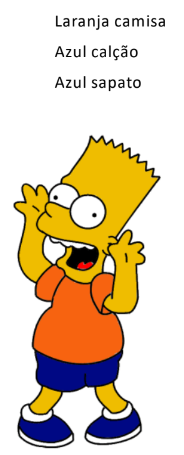
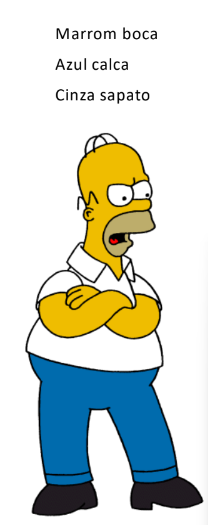

# Bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Base de Dados


In [ ]:
dtaset = pd.read_csv('/content/drive/MyDrive/Cópia de personagens.csv')

Quantidade de classificações da base de dados

<AxesSubplot:xlabel='classe', ylabel='count'>

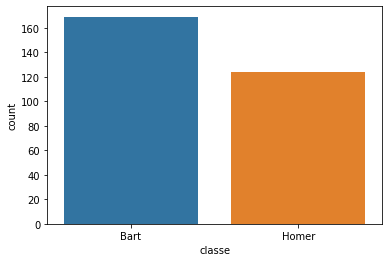

In [ ]:
sns.countplot(x = 'classe', data=dtaset)

matriz de relacao entre cada caracteristica

<AxesSubplot:>

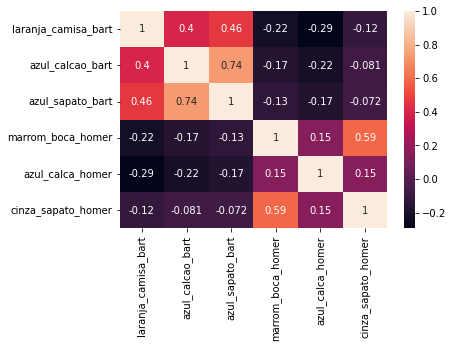

In [ ]:
sns.heatmap(dtaset.corr(), annot=True)

alocacao em variaveis

In [ ]:
X = dtaset.iloc[:, 0:6].values
y = dtaset.iloc[:, 6].values
y = (y == 'Bart')
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

# Rede Neural

A rede neural tera 3 camadas ocultas, sendo elas com 4 neuronios cada, feito pela formula: (entrada+saida)/2

(6+1)/2 = 3.5 arredonda pra 4

In [ ]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


Treinamento

In [ ]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=50, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 1s 42ms/step - loss: 0.7145 - accuracy: 0.4571 - val_loss: 0.7050 - val_accuracy: 0.4167
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7100 - accuracy: 0.4619 - val_loss: 0.7018 - val_accuracy: 0.4167
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.7065 - accuracy: 0.4667 - val_loss: 0.6991 - val_accuracy: 0.4167
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.4476 - val_loss: 0.6968 - val_accuracy: 0.4167
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.4714 - val_loss: 0.6947 - val_accuracy: 0.4167
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6980 - accuracy: 0.4571 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6958 - accuracy: 0.4810 - val_loss: 0.6916 - val_accuracy: 0.4583
Epoch 8/50
7/7 [================

# Avaliação da Rede Neural

## Historico

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Verificação do Valor do Erro

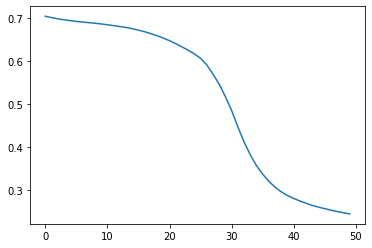

In [ ]:
plt.plot(historico.history['val_loss'])

Verificação do Valor de Precisão

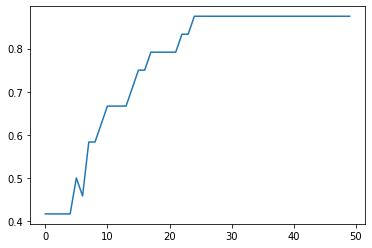

In [ ]:
plt.plot(historico.history['val_accuracy'])

## Previsoes

In [ ]:
previsoes = rede_neural.predict(X_teste)
# 1 True - Bart
# 0 False - Homer
previsoes = (previsoes > 0.5)

2/2 [==============================] - 0s 6ms/step


Porcentagem de Precisão

In [ ]:
accuracy_score(previsoes, y_teste)

0.8813559322033898

Matriz de Confusão

<AxesSubplot:>

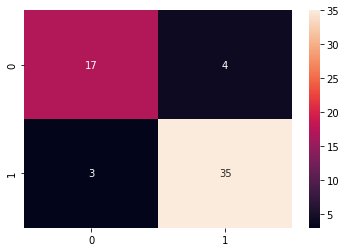

In [ ]:
cm = confusion_matrix(y_teste, previsoes)
cm
sns.heatmap(cm, annot=True)